In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from scipy.stats import ttest_ind
import json
import lib.galaxy_utilities as gu
from astropy.io import fits

In [3]:
%run make_bulge_bar_dataframes.py

FileNotFoundError: [Errno 2] No such file or directory: 'cluster-output/20902000.json'

In [4]:
bulge_df = pd.read_pickle('bulge_fractions.pkl')
bar_df = pd.read_pickle('bar_fractions.pkl')
bar_length_df = pd.read_pickle('bar_lengths.pkl')

## How frequently do people draw bulges relative to GZ2 pBulge?

In [5]:
gzb_bulge_mean = bulge_df['GZB fraction'].mean()
gzb_bulge_std = bulge_df['GZB fraction'].std()
print('\nGZB bulge fraction = {:.4f} ± {:.5f}\n'.format(
    gzb_bulge_mean, gzb_bulge_std
))
bulge_groups = bulge_df.groupby('GZ2 bulge dominated')
display(pd.DataFrame(
    np.hstack((bulge_groups.mean(), bulge_groups.std())),
    columns=('mean', 'std'),
    index=bulge_groups.mean().index
))

ttest_result = ttest_ind(
    bulge_df[bulge_df['GZ2 bulge dominated']]['GZB fraction'].values,
    bulge_df[~bulge_df['GZ2 bulge dominated']]['GZB fraction'].values
)
print('Probability samples are the same: {:%}'.format(ttest_result.pvalue))


GZB bulge fraction = 0.7579 ± 0.08141



,mean,std
GZ2 bulge dominated,,
False,0.729296,0.078066
True,0.770702,0.080579


Probability samples are the same: 8.120599%


## How frequently do people draw bars relative to GZ2 pBar?

In [6]:
print('GZB bar fraction = {:.4f} ± {:.5f}\n'.format(
    bar_df['GZB fraction'].mean(),
    bar_df['GZB fraction'].std()
))

print('P(model has bar | Strongly barred) = {:.4f} ± {:.4f}%'.format(
    bar_df.groupby('Strongly barred')['GZB fraction'].mean().loc[True],
    bar_df.groupby('Strongly barred')['GZB fraction'].std().loc[True],
))

print('P(model has bar | No bar)          = {:.4f} ± {:.4f}%'.format(
    bar_df.groupby('No bar')['GZB fraction'].mean().loc[True],
    bar_df.groupby('No bar')['GZB fraction'].std().loc[True],
))

ttest_result = ttest_ind(
    bar_df[bar_df['Strongly barred']]['GZB fraction'].values,
    bar_df[bar_df['No bar']]['GZB fraction'].values
)
print('\nProbability samples are the same: {:%}'.format(ttest_result.pvalue))

GZB bar fraction = 0.4150 ± 0.15172

P(model has bar | Strongly barred) = 0.5713 ± 0.1549%
P(model has bar | No bar)          = 0.3074 ± 0.0878%

Probability samples are the same: 0.000017%


## How does pbar stack up against aggregate bar length?

Spearman correlation:
                  GZB bar length  GZ2 bar fraction  GZB fraction
GZB bar length           1.00000          0.420490      0.315280
GZ2 bar fraction         0.42049          1.000000      0.750577
GZB fraction             0.31528          0.750577      1.000000


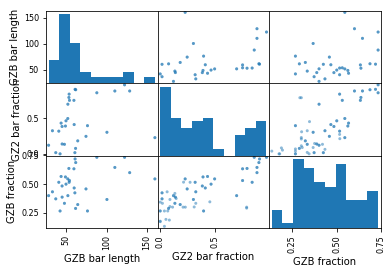

In [7]:
# bar_length_df.plot.scatter(x='GZ2 bar fraction', y='GZB bar length')
pd.plotting.scatter_matrix(bar_length_df);
print('Spearman correlation:')
print(bar_length_df.corr('spearman'))